In [1]:
import torch
from torchvision import transforms
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
dtype = np.float64

Text(0.5, 1.0, 'Blue 3')

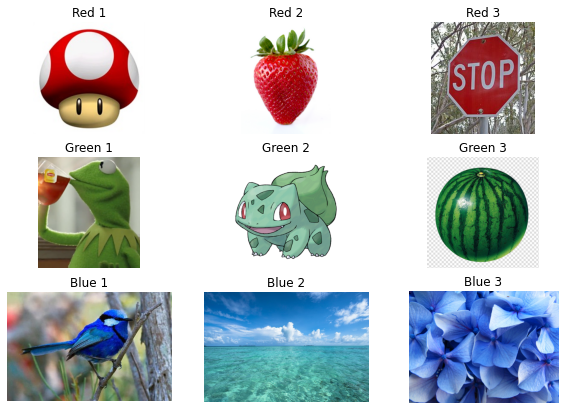

In [2]:
#QUESTION 1
#Load images
Rimg1 = Image.open("./Red1.jpg")
Rimg2 = Image.open("./Red2.jpg")
Rimg3 = Image.open("./Red3.jpg")
Gimg1 = Image.open("./Green1.png")
Gimg2 = Image.open("./Green2.png")
Gimg3 = Image.open("./Green3.jpg")
Bimg1 = Image.open("./Blue1.jpg")
Bimg2 = Image.open("./Blue2.jpg")
Bimg3 = Image.open("./Blue3.jpg")

#Display images
fig = plt.figure(figsize=(10, 7))
rows = 3
columns = 3

fig.add_subplot(rows, columns, 1)
plt.imshow(Rimg1)
plt.axis('off')
plt.title("Red 1")
  
fig.add_subplot(rows, columns, 2)
plt.imshow(Rimg2)
plt.axis('off')
plt.title("Red 2")
  
fig.add_subplot(rows, columns, 3)
plt.imshow(Rimg3)
plt.axis('off')
plt.title("Red 3")

fig.add_subplot(rows, columns, 4)
plt.imshow(Gimg1)
plt.axis('off')
plt.title("Green 1")
  
fig.add_subplot(rows, columns, 5)
plt.imshow(Gimg2)
plt.axis('off')
plt.title("Green 2")
  
fig.add_subplot(rows, columns, 6)
plt.imshow(Gimg3)
plt.axis('off')
plt.title("Green 3")

fig.add_subplot(rows, columns, 7)
plt.imshow(Bimg1)
plt.axis('off')
plt.title("Blue 1")
  
fig.add_subplot(rows, columns, 8)
plt.imshow(Bimg2)
plt.axis('off')
plt.title("Blue 2")
  
fig.add_subplot(rows, columns, 9)
plt.imshow(Bimg3)
plt.axis('off')
plt.title("Blue 3")

In [3]:
#Transform to tensor
transform = transforms.ToTensor()
RT1 = transform(Rimg1)
RT2 = transform(Rimg2)
RT3 = transform(Rimg3)
GT1 = transform(Gimg1)
GT2 = transform(Gimg2)
GT3 = transform(Gimg3)
BT1 = transform(Bimg1)
BT2 = transform(Bimg2)
BT3 = transform(Bimg3)

#Take means of tensors
Rmean1 = torch.mean(RT1)
Rmean2 = torch.mean(RT2)
Rmean3 = torch.mean(RT3)
Gmean1 = torch.mean(GT1)
Gmean2 = torch.mean(GT2)
Gmean3 = torch.mean(GT3)
Bmean1 = torch.mean(BT1)
Bmean2 = torch.mean(BT2)
Bmean3 = torch.mean(BT3)

print("Red Mean 1: ", Rmean1)
print("Red Mean 2: ", Rmean2)
print("Red Mean 3: ", Rmean3)
print("Green Mean 1: ", Gmean1)
print("Green Mean 2: ", Gmean2)
print("Green Mean 3: ", Gmean3)
print("Blue Mean 1: ", Bmean1)
print("Blue Mean 2: ", Bmean2)
print("Blue Mean 3: ", Bmean3)

Red Mean 1:  tensor(0.6951)
Red Mean 2:  tensor(0.7302)
Red Mean 3:  tensor(0.4540)
Green Mean 1:  tensor(0.5727)
Green Mean 2:  tensor(0.5335)
Green Mean 3:  tensor(0.5442)
Blue Mean 1:  tensor(0.4763)
Blue Mean 2:  tensor(0.5420)
Blue Mean 3:  tensor(0.5221)


In [4]:
#Channel means
RCmean1 = torch.mean(RT1, dim =[1,2])
RCmean2 = torch.mean(RT2, dim =[1,2])
RCmean3 = torch.mean(RT3, dim =[1,2])
GCmean1 = torch.mean(GT1, dim =[1,2])
GCmean2 = torch.mean(GT2, dim =[1,2])
GCmean3 = torch.mean(GT3, dim =[1,2])
BCmean1 = torch.mean(BT1, dim =[1,2])
BCmean2 = torch.mean(BT2, dim =[1,2])
BCmean3 = torch.mean(BT3, dim =[1,2])

print("Red Mean 1: ", RCmean1)
print("Red Mean 2: ", RCmean2)
print("Red Mean 3: ", RCmean3)
print("Green Mean 1: ", GCmean1)
print("Green Mean 2: ", GCmean2)
print("Green Mean 3: ", GCmean3)
print("Blue Mean 1: ", BCmean1)
print("Blue Mean 2: ", BCmean2)
print("Blue Mean 3: ", BCmean3)

Red Mean 1:  tensor([0.8186, 0.6485, 0.6182])
Red Mean 2:  tensor([0.8559, 0.6725, 0.6622])
Red Mean 3:  tensor([0.5501, 0.4100, 0.4018])
Green Mean 1:  tensor([0.4646, 0.5040, 0.3220, 1.0000])
Green Mean 2:  tensor([0.4886, 0.5743, 0.5225, 0.5484])
Green Mean 3:  tensor([0.4855, 0.6238, 0.5234])
Blue Mean 1:  tensor([0.4523, 0.4825, 0.4943])
Blue Mean 2:  tensor([0.3052, 0.6047, 0.7161])
Blue Mean 3:  tensor([0.3268, 0.4695, 0.7701])


In [5]:
#QUESTION 2

def model(t_u, w1, w2, b):
    return w2*pow((t_u),2)+(w1*t_u)+b
def loss_fn(t_p, t_c):
    squared_diffs = pow((t_p - t_c),2)
    return squared_diffs.mean()
def dmodel_dw1(t_u, w1, w2, b):
    return t_u
def dmodel_dw2(t_u, w1, w2, b):
    return t_u
def dmodel_db(t_u, w1, w2, b):
    return 1
def dloss_fn(t_p, t_c):
    dsq_diffs = (2 * (t_p - t_c)) / t_p.size(0)
    return dsq_diffs
def grad_fn(t_u, t_c, t_p, w1, w2, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw1 = dloss_dtp * dmodel_dw1(t_u, w1, w2, b)
    dloss_dw2 = dloss_dtp * dmodel_dw2(t_u, w1, w2, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w1, w2, b)
    return torch.stack([dloss_dw1.sum(), dloss_dw2.sum(), dloss_db.sum()])
#Training loop:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        w1, w2, b = params
        t_p = model(t_u, w1, w2, b)
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w1, w2, b)

        params = params - learning_rate * grad
        
        if epoch == 1:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
     
    return params
    
t_u = np.array([35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4])
t_c = np.array([0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0])

t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

w = torch.ones(())
w1 = torch.ones(())
w2 = torch.ones(())
b = torch.zeros(())

In [6]:
t_un = 0.1 * t_u
learn_rate = 0.0046
print("Non-linear Results for the following learning rate: ", learn_rate)
params = training_loop(n_epochs = 5000, 
                       learning_rate = learn_rate, 
                       params = torch.tensor([1, 1, 0]), 
                       t_u = t_un, 
                       t_c = t_c);

Non-linear Results for the following learning rate:  0.0046
Epoch 1, Loss 675.794089
Epoch 500, Loss 4.416167
Epoch 1000, Loss 2.949554
Epoch 1500, Loss 2.576488
Epoch 2000, Loss 2.491918
Epoch 2500, Loss 2.478761
Epoch 3000, Loss 2.480645
Epoch 3500, Loss 2.484119
Epoch 4000, Loss 2.486651
Epoch 4500, Loss 2.488185
Epoch 5000, Loss 2.489051


In [7]:
def lin_model(t_u, w, b):
    return w*t_u+b
def loss_fn(t_p, t_c):
    squared_diffs = pow((t_p - t_c),2)
    return squared_diffs.mean()
def dmodel_dw(t_u, w, b):
    return t_u
def dmodel_db(t_u, w, b):
    return 1
def dloss_fn(t_p, t_c):
    dsq_diffs = (2 * (t_p - t_c)) / t_p.size(0)
    return dsq_diffs
def grad_fn(t_u, t_c, t_p, w, b):
    dloss_dtp = dloss_fn(t_p, t_c)
    dloss_dw = dloss_dtp * dmodel_dw(t_u, w, b)
    dloss_db = dloss_dtp * dmodel_db(t_u, w, b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])
def lin_training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        w, b = params
        t_p = lin_model(t_u, w, b)
        loss = loss_fn(t_p, t_c)
        grad = grad_fn(t_u, t_c, t_p, w, b)

        params = params - learning_rate * grad
        
        if epoch == 1:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
     
    return params


In [8]:
print("Linear results for the following learning rate: ", learn_rate)
lin_params = lin_training_loop(n_epochs = 5000, 
                       learning_rate = learn_rate, 
                       params = torch.tensor([1, 0]), 
                       t_u = t_un, 
                       t_c = t_c);

Linear results for the following learning rate:  0.0046
Epoch 1, Loss 80.364345
Epoch 500, Loss 15.263071
Epoch 1000, Loss 8.572471
Epoch 1500, Loss 5.510779
Epoch 2000, Loss 4.109716
Epoch 2500, Loss 3.468574
Epoch 3000, Loss 3.175180
Epoch 3500, Loss 3.040920
Epoch 4000, Loss 2.979481
Epoch 4500, Loss 2.951366
Epoch 5000, Loss 2.938500


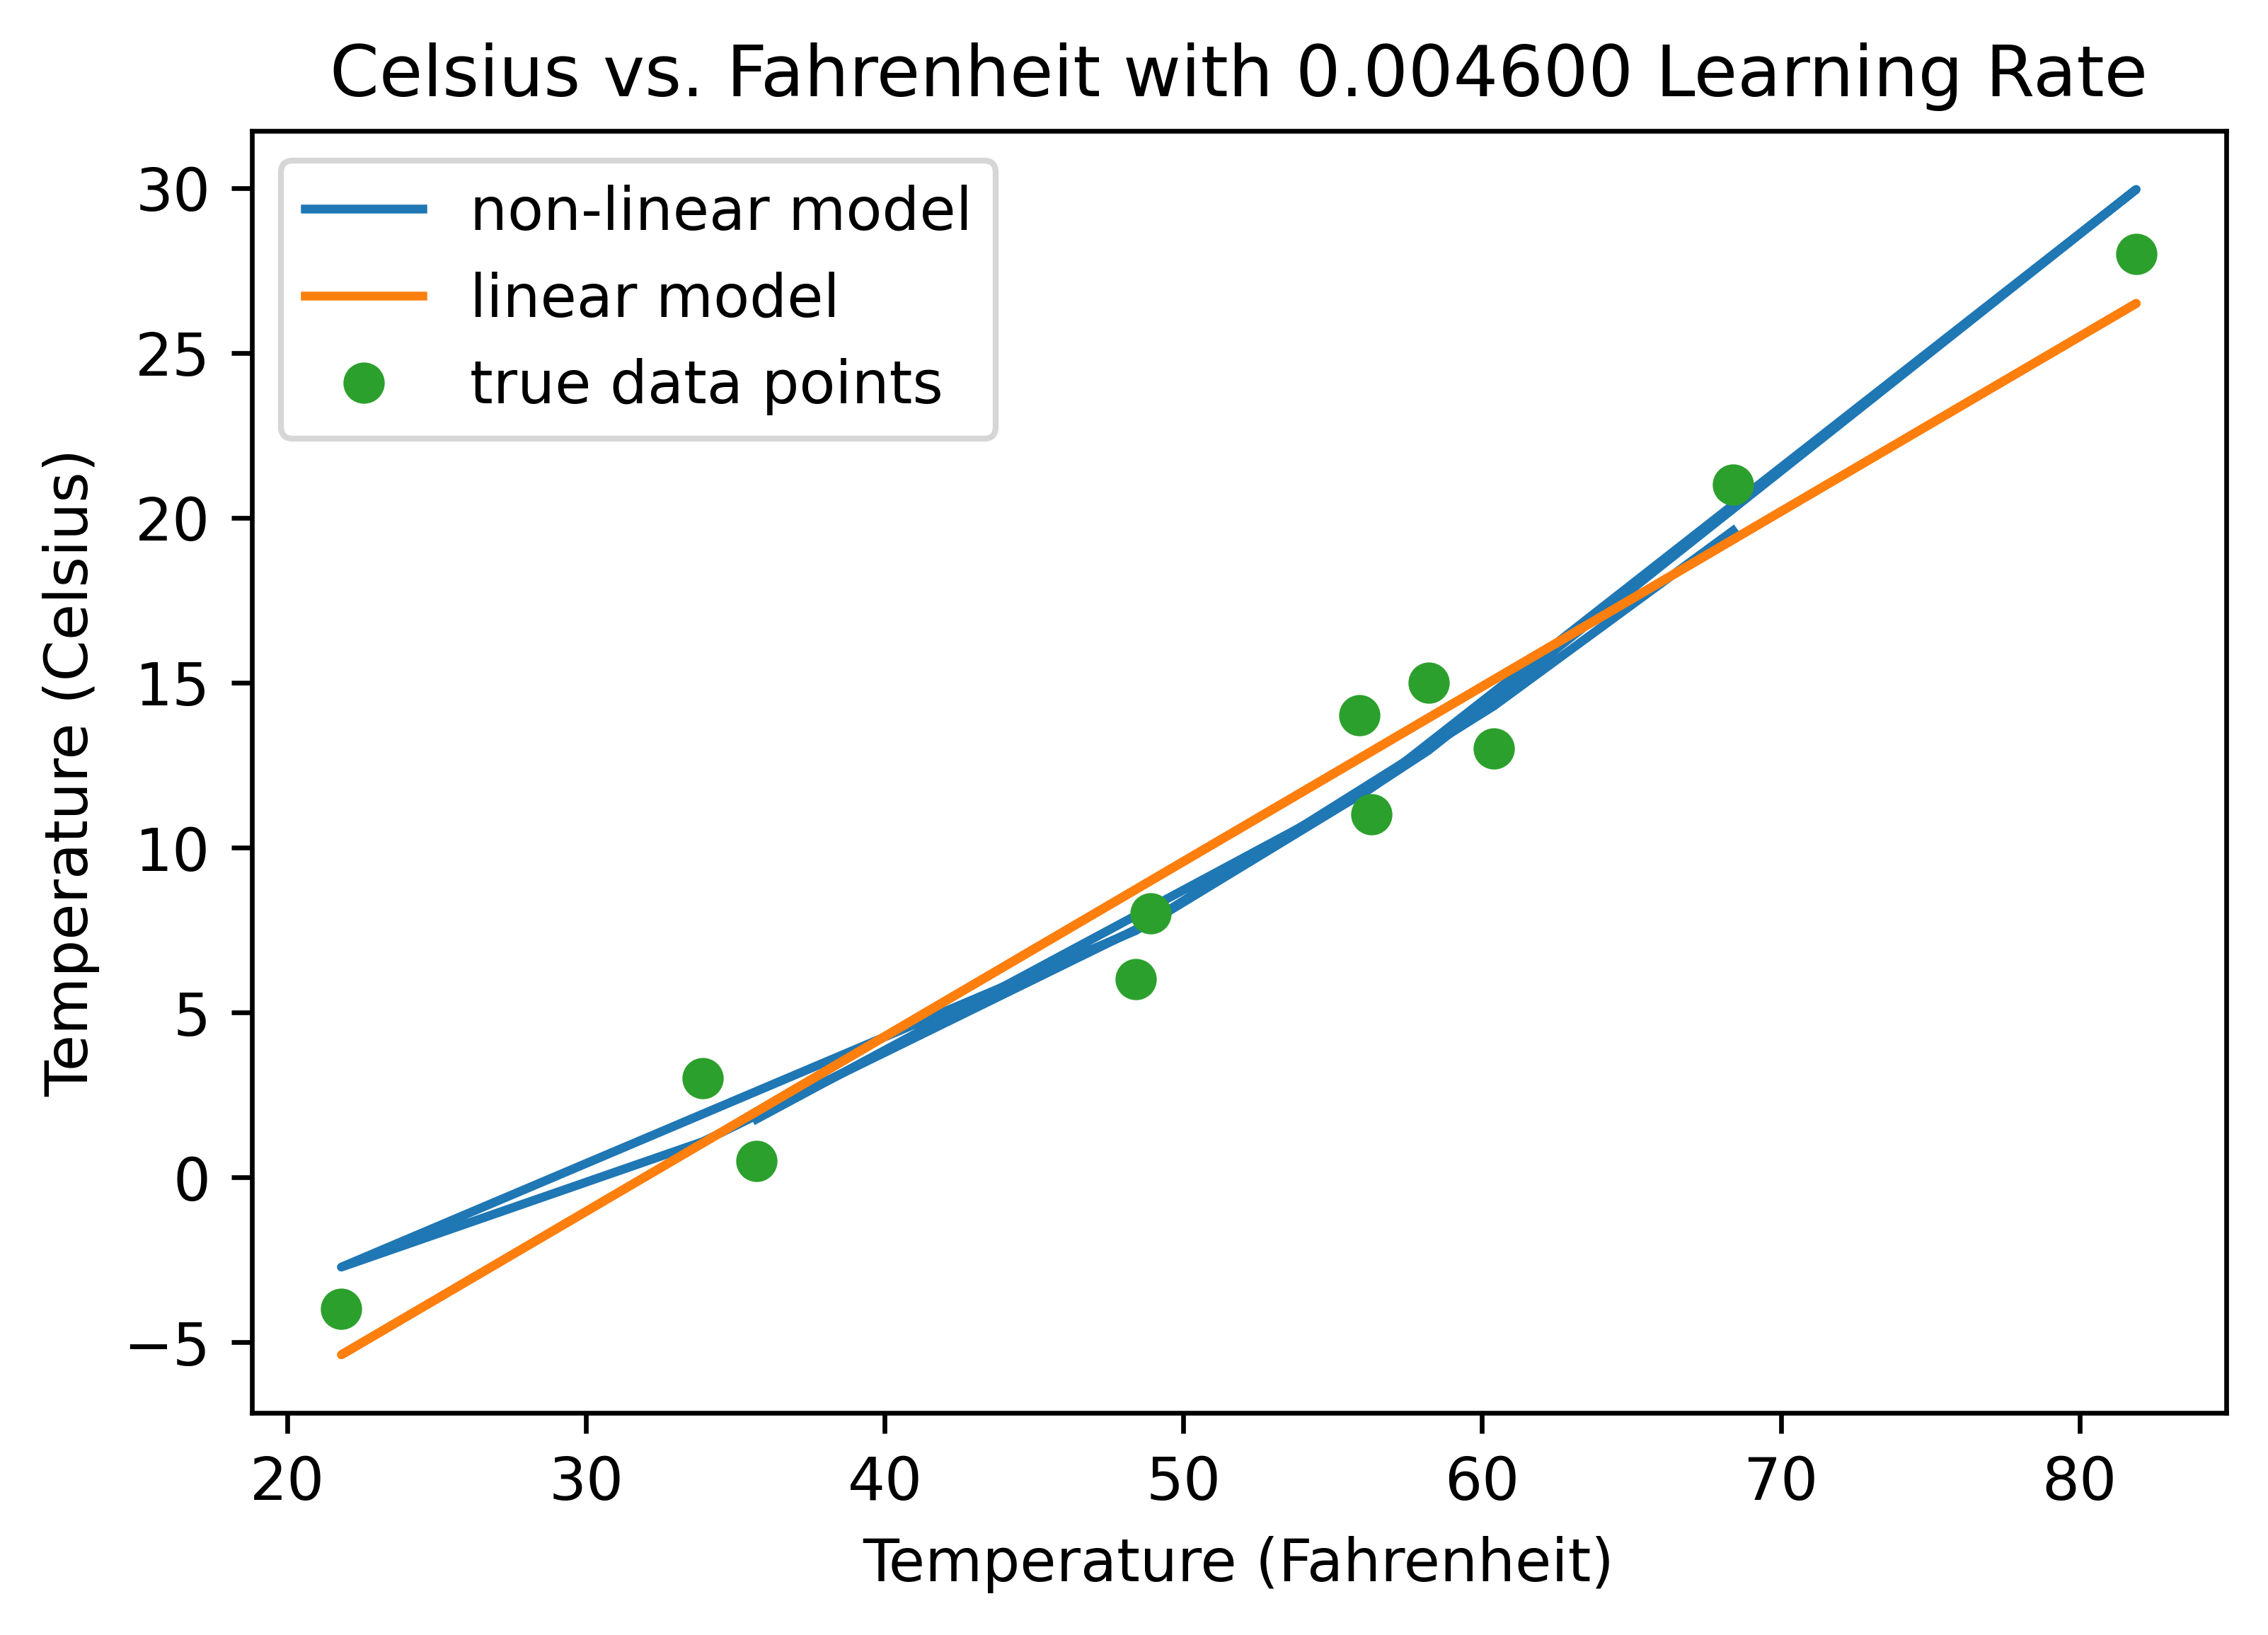

In [9]:
t_p = model(t_un, *params)
lin_t_p = lin_model(t_un, *lin_params)

fig = plt.figure(dpi=600)
plt.title("Celsius vs. Fahrenheit with %f Learning Rate" % (learn_rate))
plt.xlabel("Temperature (Fahrenheit)")
plt.ylabel("Temperature (Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy(), label="non-linear model")
plt.plot(t_u.numpy(), lin_t_p.detach().numpy(), label="linear model")
plt.plot(t_u.numpy(), t_c.numpy(), 'o', label = "true data points")
plt.legend()

In [10]:
#QUESTION 3

#load dataset and extract desired parameters
housing = pd.read_csv("Housing.csv")
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price'] 
raw_data = housing[num_vars] 
raw_data.head() 

,area,bedrooms,bathrooms,stories,parking,price
0,7420,4,2,3,2,13300000
1,8960,4,4,4,3,12250000
2,9960,3,2,2,2,12250000
3,7500,4,2,2,3,12215000
4,7420,4,1,2,2,11410000


In [11]:
#Preprocess the data
scalar = StandardScaler()
data = scalar.fit_transform(raw_data)
print(data)

raw_area = torch.tensor(raw_data.iloc[:,0].values)
raw_bedrooms = torch.tensor(raw_data.iloc[:,1].values)
raw_bathrooms = torch.tensor(raw_data.iloc[:,2].values)
raw_stories = torch.tensor(raw_data.iloc[:,3].values)
raw_parking = torch.tensor(raw_data.iloc[:,4].values)
raw_price = torch.tensor(raw_data.iloc[:,5].values)

area = torch.tensor(data[:,0])
bedrooms = torch.tensor(data[:,1])
bathrooms = torch.tensor(data[:,2])
stories = torch.tensor(data[:,3])
parking = torch.tensor(data[:,4])
price = torch.tensor(data[:,5])

w1 = torch.ones(())
w2 = torch.ones(())
w3 = torch.ones(())
w4 = torch.ones(())
w5 = torch.ones(())
b = torch.zeros(())

[[ 1.04672629  1.40341936  1.42181174  1.37821692  1.51769249  4.56636513]
 [ 1.75700953  1.40341936  5.40580863  2.53202371  2.67940935  4.00448405]
 [ 2.21823241  0.04727831  1.42181174  0.22441013  1.51769249  4.00448405]
 ...
 [-0.70592066 -1.30886273 -0.57018671 -0.92939666 -0.80574124 -1.61432675]
 [-1.03338891  0.04727831 -0.57018671 -0.92939666 -0.80574124 -1.61432675]
 [-0.5998394   0.04727831 -0.57018671  0.22441013 -0.80574124 -1.61432675]]


In [12]:
def model(area, bedrooms, bathrooms, stories, parking, w1, w2, w3, w4, w5, b):
    return (area*w1) + (bedrooms*w2) + (bathrooms*w3) + (stories*w4) + (parking*w5) + b
def loss_fn(t_p, price):
    squared_diffs = pow((t_p - price),2)
    return squared_diffs.mean()
def dmodel_dw1(area, w1, b):
    return area
def dmodel_dw2(bedrooms, w2, b):
    return bedrooms
def dmodel_dw3(bathrooms, w3, b):
    return bathrooms
def dmodel_dw4(stories, w4, b):
    return stories
def dmodel_dw5(parking, w5, b):
    return parking
def dmodel_db(area, bedrooms, bathrooms, stories, parking, w1, w2, w3, w4, w5, b):
    return 1
def dloss_fn(t_p, price):
    dsq_diffs = (2 * (t_p - price)) / t_p.size(0)
    return dsq_diffs
def grad_fn(area, bedrooms, bathrooms, stories, parking, price, t_p, w1, w2, w3, w4, w5, b):
    dloss_dtp = dloss_fn(t_p, price)
    dloss_dw1 = dloss_dtp * dmodel_dw1(area, w1, b)
    dloss_dw2 = dloss_dtp * dmodel_dw2(bedrooms, w2, b)
    dloss_dw3 = dloss_dtp * dmodel_dw2(bathrooms, w3, b)
    dloss_dw4 = dloss_dtp * dmodel_dw2(stories, w4, b)
    dloss_dw5 = dloss_dtp * dmodel_dw2(parking, w5, b)
    dloss_db = dloss_dtp * dmodel_db(area, bedrooms, bathrooms, stories, parking, w1, w2, w3, w4, w5, b)
    return torch.stack([dloss_dw1.sum(), dloss_dw2.sum(), dloss_dw3.sum(), dloss_dw4.sum(), dloss_dw5.sum(), dloss_db.sum()])
def training_loop(n_epochs, learning_rate, params, area, bedrooms, bathrooms, stories, parking, price):
    loss_hist = np.zeros(n_epochs+1)
    for epoch in range(1, n_epochs + 1):
        w1, w2, w3, w4, w5, b = params
        t_p = model(area, bedrooms, bathrooms, stories, parking, w1, w2, w3, w4, w5, b)
        loss = loss_fn(t_p, price)
        loss_hist[epoch] = float(loss)       
        grad = grad_fn(area, bedrooms, bathrooms, stories, parking, price, t_p, w1, w2, w3, w4, w5, b)
        params = params - learning_rate * grad
        
        if epoch == 1:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
     
    return params, loss_hist

In [13]:
learn_rate = 0.1
print("Linear results for the following learning rate: ", learn_rate)
params, loss = training_loop(n_epochs = 5000, 
                             learning_rate = learn_rate, 
                             params = torch.tensor([1, 1, 1, 1, 1, 0]), 
                             area = area, 
                             bedrooms = bedrooms, 
                             bathrooms = bathrooms, 
                             stories = stories, 
                             parking = parking, 
                             price = price);


Linear results for the following learning rate:  0.1
Epoch 1, Loss 6.056968
Epoch 500, Loss 0.438417
Epoch 1000, Loss 0.438417
Epoch 1500, Loss 0.438417
Epoch 2000, Loss 0.438417
Epoch 2500, Loss 0.438417
Epoch 3000, Loss 0.438417
Epoch 3500, Loss 0.438417
Epoch 4000, Loss 0.438417
Epoch 4500, Loss 0.438417
Epoch 5000, Loss 0.438417


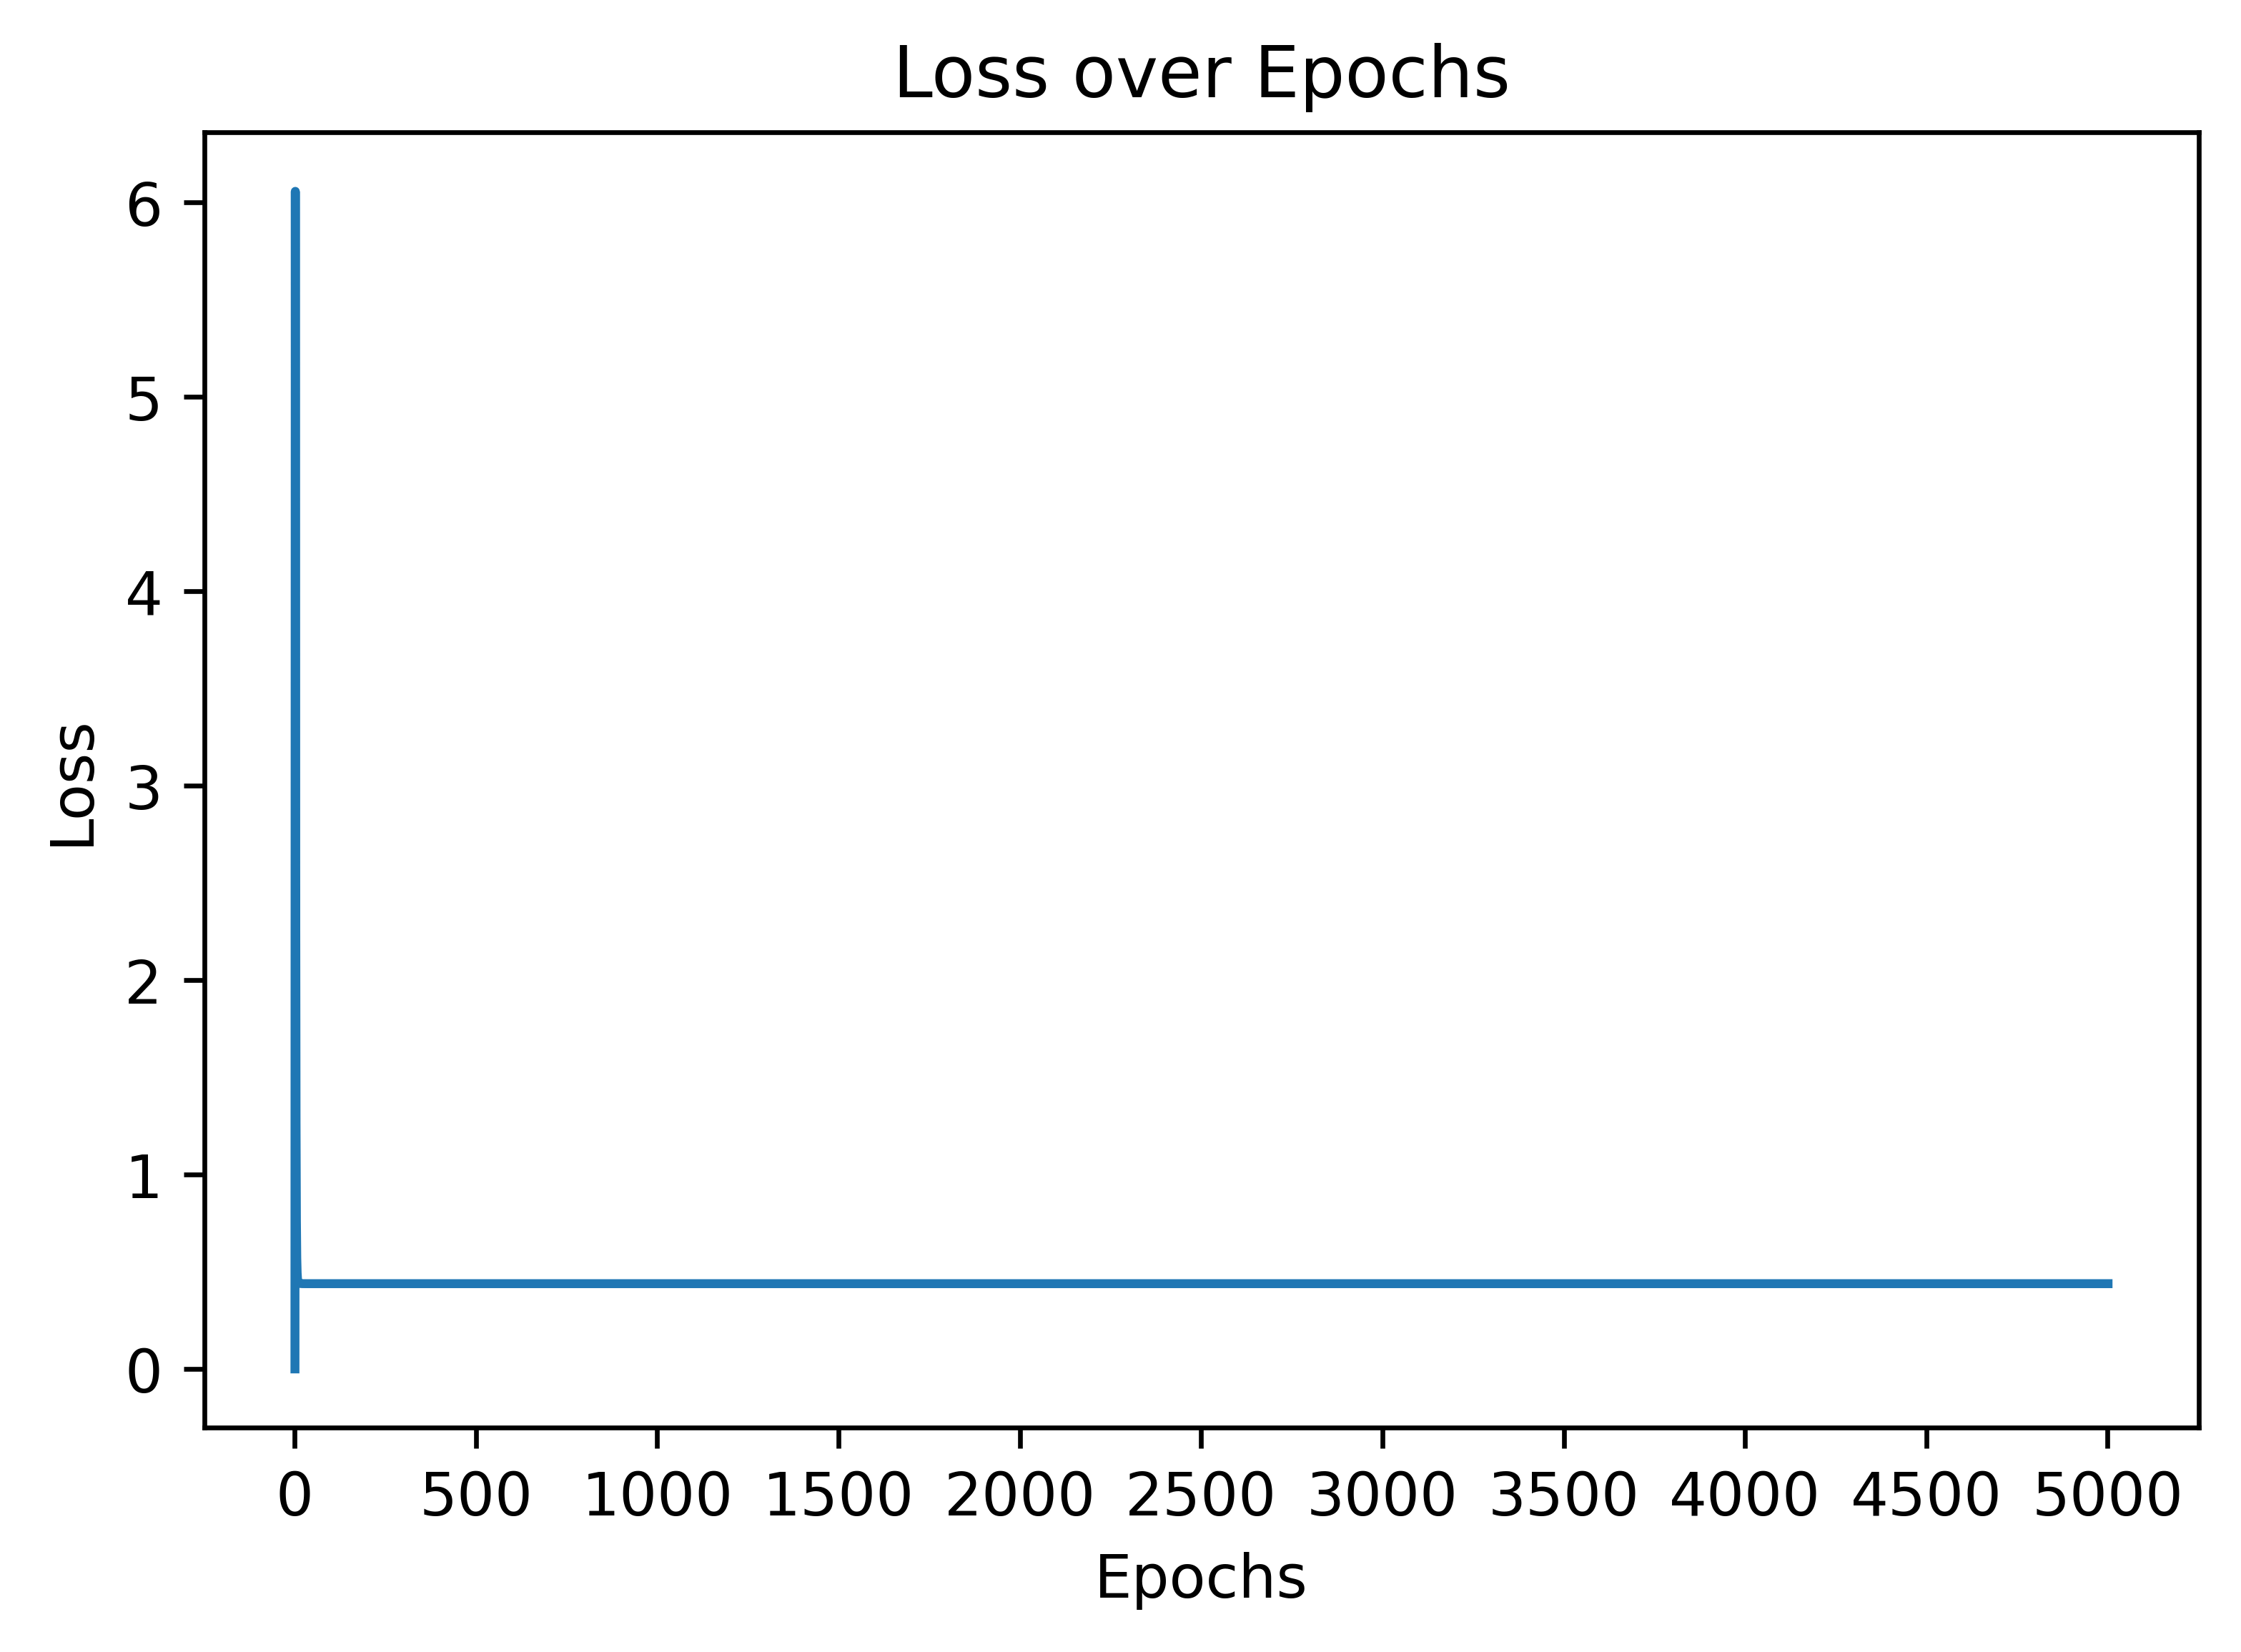

In [14]:
fig = plt.figure(dpi=600)
plt.title("Loss over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(range(1,5000 +2), loss)
plt.xticks(np.arange(0, 5000+2, 500));

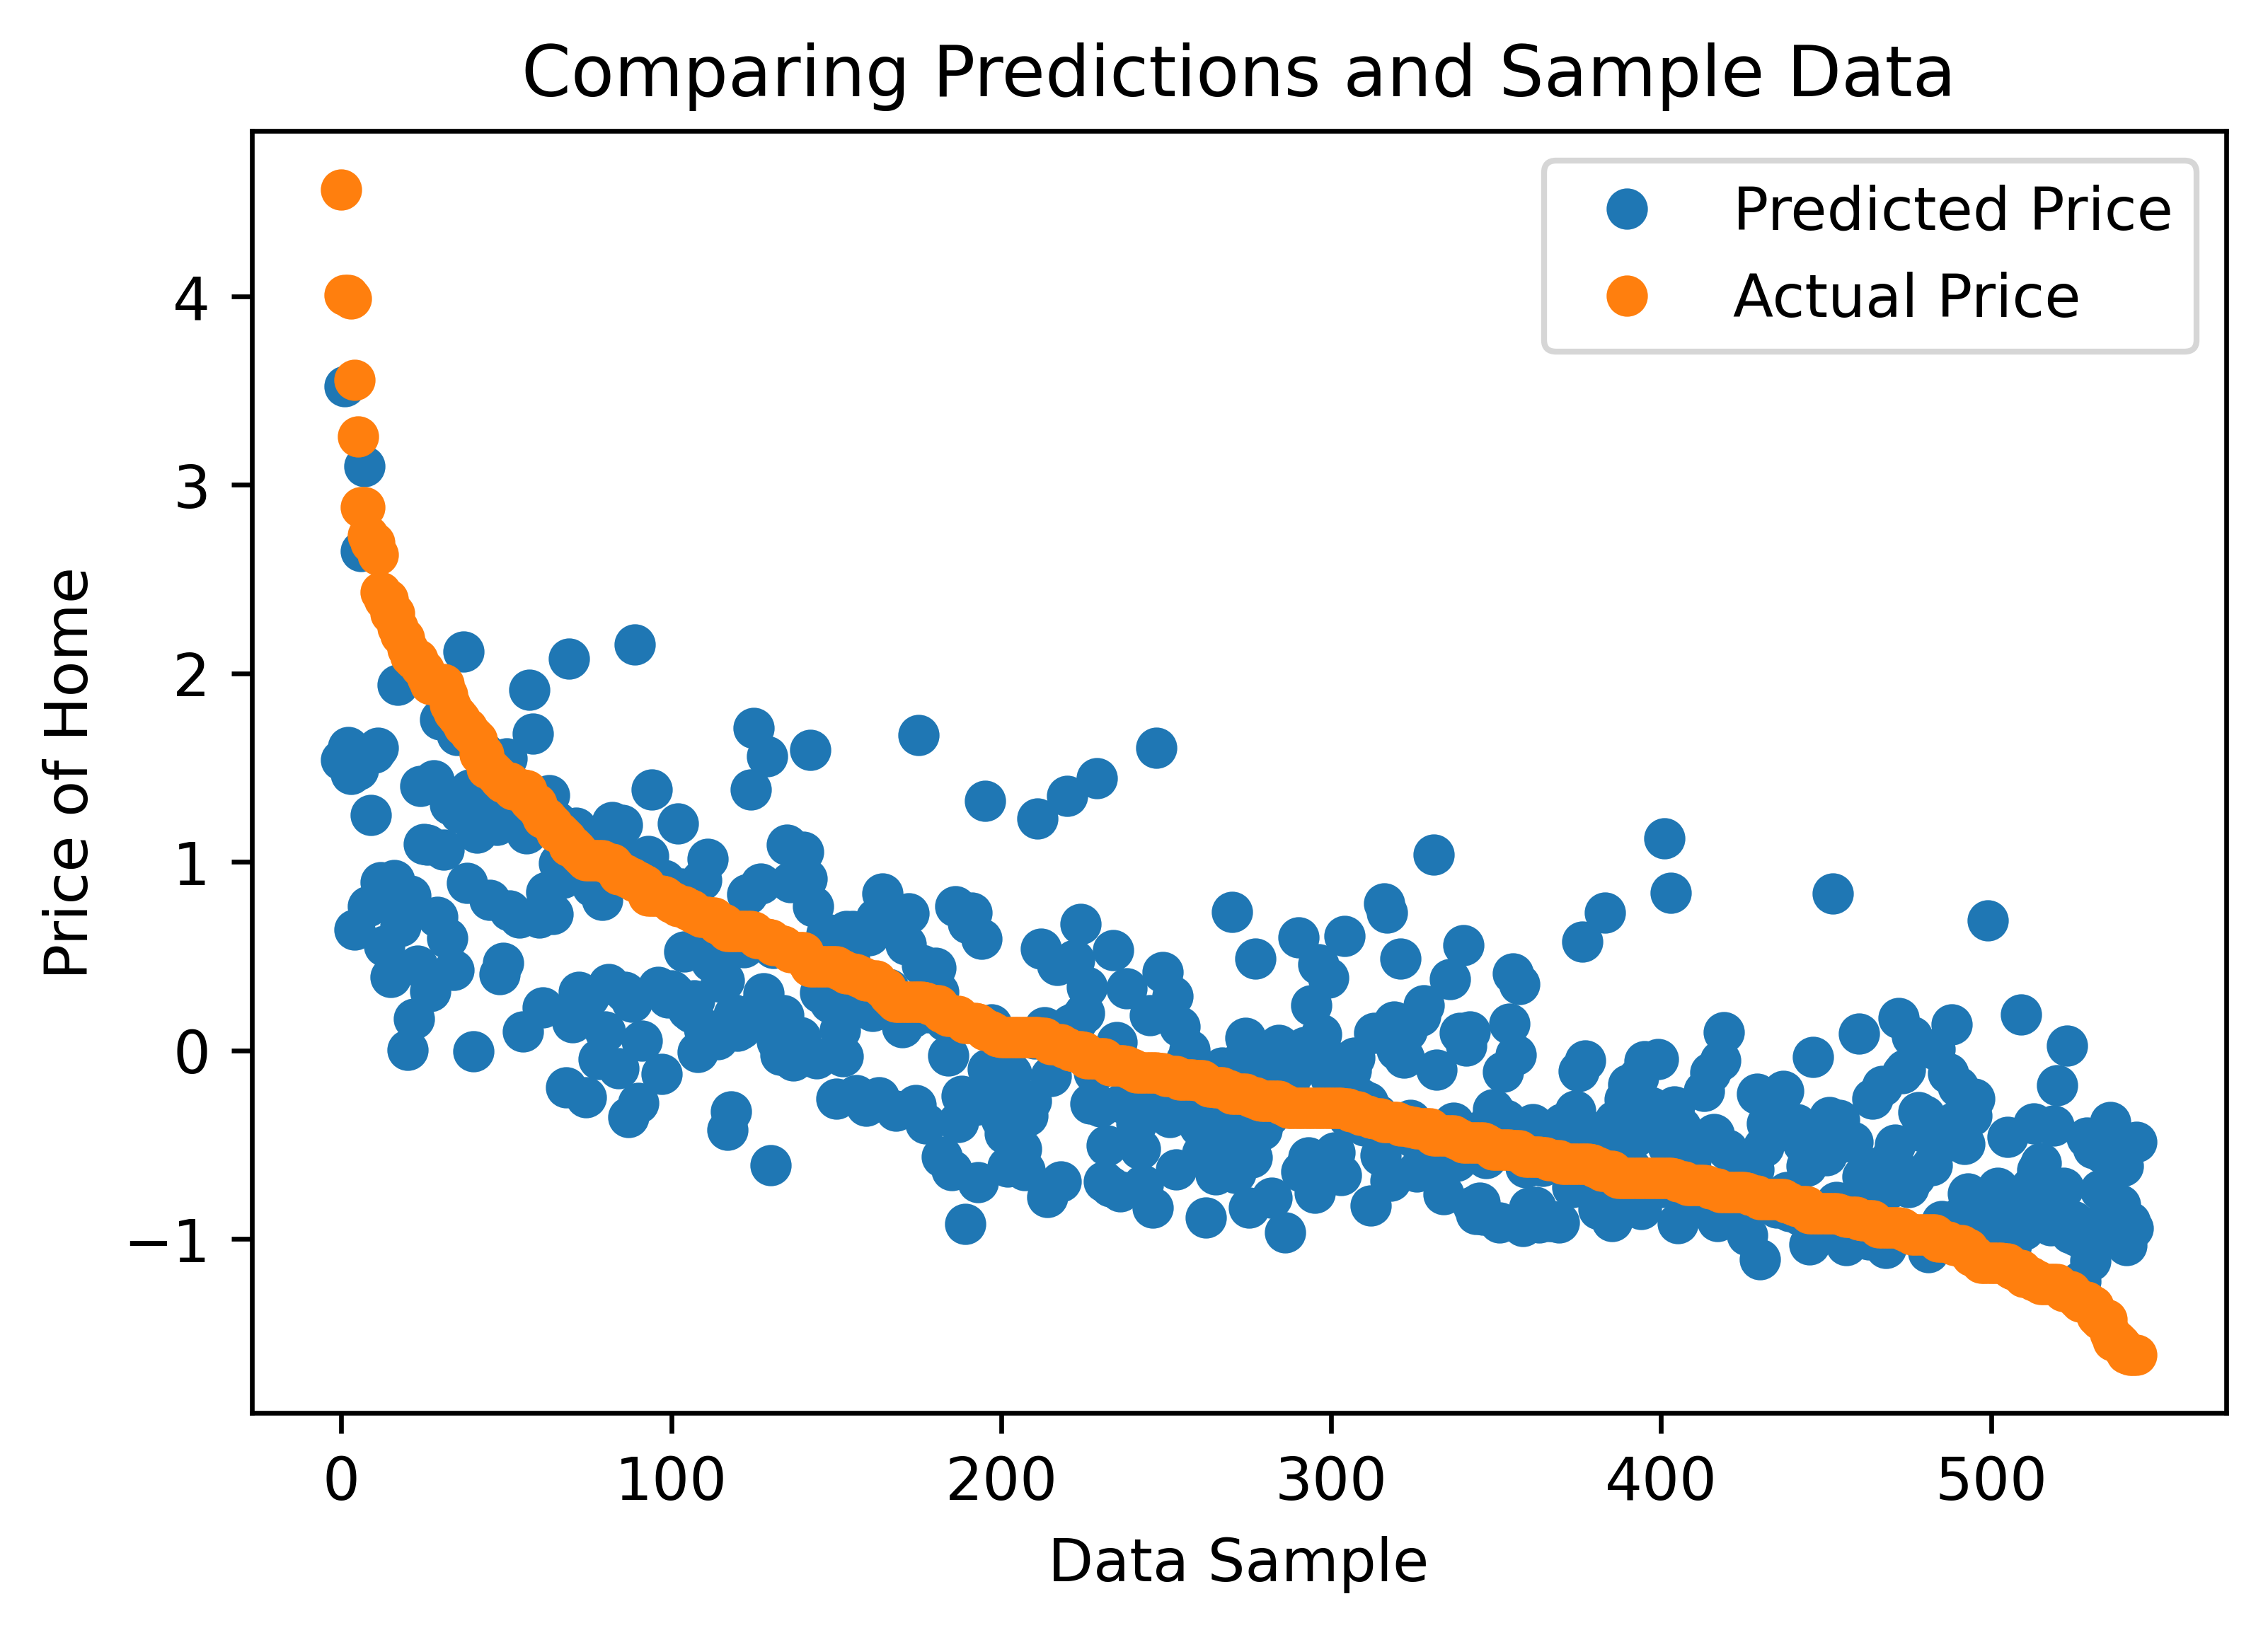

In [15]:
t_p = model(area, bedrooms, bathrooms, stories, parking, *params)
fig = plt.figure(dpi=600)
plt.title("Comparing Predictions and Sample Data")
plt.xlabel("Data Sample")
plt.ylabel("Price of Home")
plt.plot(t_p.detach().numpy(), 'o', label="Predicted Price")
plt.plot(price.numpy(), 'o', label="Actual Price")
plt.legend()